<div class="alert alert-info">
    <h1><strong>BitCamp Hackathon:</strong> Quantum Track </h1>
    <h2><strong> Challenge 1 </strong>- Gates</h2>
</div>

In [1]:
# Imports!
import numpy as np
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.visualization import *
import matplotlib.pyplot as plt
print("Libraries imported successfully!")

Libraries imported successfully!


## A warm up on using Qiskit
This notebook will get you up to speed on:
* Applying Gates
* Using Simulators
* Building circuits with functions

### Reminder on using creating circuits!
The `QuantumCircuit` class is qiskit's way of designing a quanutm circuit, it takes two inputs: `qubtis` and `classical bits` which tell the circuit how many qubits and classical bits to use.

We can build a quantum circuit in qiskit with the following:
```python
qc = QuantumCircuit(q,c)
```

In [2]:
# This creates a quantum circuit object
qc = QuantumCircuit(1,1) # one qubit and one classical bit

### Drawing and Displaying Circuits

Qiskit has a function `circ.draw()` for drawing a diagram of circuits. We can also specify the output type, here we choose to use matplotlib `output="mpl"`.

Together we can visualise our circuit with: `circ.draw(output="mpl")`

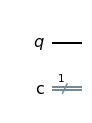

In [3]:
# This prints out a diagram of the circuit, the "mpl" makes it look pretty!
qc.draw(output="mpl")

### Adding gates to a quantum circuit
This can be done by calling the `qc.gate(qubit)` command. 
Here the `gate` refers to the gate type, and the `qubit` refers to the qubit (or qubits) on which the gate is acting

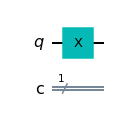

In [4]:
# Adding a NOT gate (aka an X gate) to qubit 0
qc.x(0)
qc.draw(output="mpl")

<a id="q1a"></a>
# Practice: Implementing single qubit gates
## Single Qubit Gates

### *The X Gate* 
The X gate rotates the state vector by $\pi$ radians about the x-axis on the bloch sphere.

The syntax for an X gate is: `qc.x(target)` where `qc` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**Block 1:**
Initialize a new circuit and add an X gate to it, then draw it.

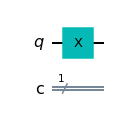

In [5]:
qc2 = QuantumCircuit(1, 1) # one qubit
qc2.x(0) # on the 0-th qubit
qc2.draw(output='mpl')

<a id="q1b"></a>

### *The Y Gate* 

The Y gate rotates the state vector by $\pi$ radians about the y-axis on the bloch sphere.

The syntax for a Y gate is: `qc.y(target)` where `qc` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**Block 2:**
Initialize a new circuit and add a Y gate to it, then draw it.

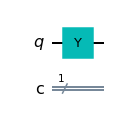

In [6]:
qc3 = QuantumCircuit(1,1)
qc3.y(0)
qc3.draw(output='mpl')

<a id="q1c"></a>
### The Z Gate

The Z gate rotates the state vector by $\pi$  radians about the z-axis on the bloch sphere.

The syntax for a Z gate is: `qc.z(target)` where `qc` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**BLOCK 3:**
Initialize a new circuit and add a Z gate to it, then draw it.

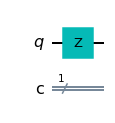

In [7]:
qc4 = QuantumCircuit(1,1)
qc4.z(0)
qc4.draw(output='mpl')

<a id="q1c"></a>
### The H Gate

The H gate rotates the state vector by $\pi$  radians about the xz-diagonal axis on the bloch sphere.

We will discuss the implications of this gate in workshop 2, for now we will only focus on gates as rotations of the Bloch sphere.

The syntax for a H gate is: `qc.h(target)` where `qc` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**BLOCK 4:**
Initialize a new circuit and add a H gate to it, then draw it.

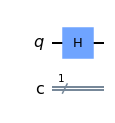

In [8]:
qc5 = QuantumCircuit(1, 1)
qc5.h(0)
qc5.draw(output="mpl")

### The Measurement Gate

The Measurement gate tells the backend when it is time to check the state of our qubits.
For the majority of use cases it is easiest to apply `qc.measure_all()` which puts a measurement gate on every qubit. 

*It is possible to specify a measurement on specific qubits to read out to specific classical bits with `qc.measure([qubits],[classical])`, but we will learn that when it becomes necessary*

**BLOCK 5:**
Initialize a new circuit and add measurement gates to it, then draw it.

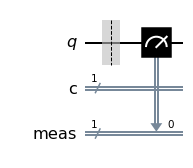

In [9]:
qc6 = QuantumCircuit(1,1)
qc6.measure_all()
qc6.draw(output='mpl')

# Simulating circuits

## While there are a few simulators to choose from, we will only focus on the QASM simulator for this Hackathon:

The `qasm_simulator` : a Noisy, realistic comparison to a current real quantum computers.

Using a simulator has 3 steps:
1. Creating the backend
``` python
qsim = Aer.get_backend('qasm_simulator')
```
2. Creating a job: tells the backend to run your circuit
``` python
job = execute(qc, backend=qsim, shots=1024)
```
3. Pulling the results from the job
``` python 
result = job.result()
```

Once the result of the simulation has been recieved we normally like to visualize the counts in a histogram.
This involves two steps:
1. Getting the counts
```python
counts = result.get_counts(qc) 
```
2. Plotting the counts
``` python
plot_histogram(counts)
```

**BLOCK 6:** Create a new 1 qubit, 1 classical bit quantum circuit, add the X,Y,H, and Z gates and simulate the results

/Users/justinventura/miniconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/justinventura/miniconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


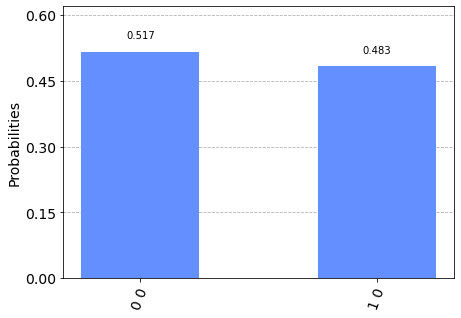

In [10]:
# Create the circuit and apply the gates:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.y(0)
qc.h(0)
qc.z(0)
qc.measure_all()

# Run the simulation:
qsim = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=qsim, shots=1024)
result = job.result()

# Plot the probability distribution:
counts = result.get_counts(qc)
plot_histogram(counts)

# That's the fundamentals of qiskit!

Now let's flex our python skills

When we make a `qc = QuantumCircuit(1,1)` object, any gate applied to the quantum circuit will alter the original `qc` object. This allows us a very pythonic way to create quantum circuits using functions:

``` python
def circuit_altering_function(qc, qubit):
    qc.x(qubit)
```

**BLOCK 7:** Define a function that applies an X gate to a `qc` argument 

In [11]:
def x_gate_on(qc, qubit):
    qc.x(qubit)

**BLOCK 8:** Define a function that applies a Y gate to a `qc` argument 

In [12]:
def y_gate_on(qc, qubit):
    qc.y(qubit)

**BLOCK 9:** Define a function that applies a Z gate to a `qc` argument 

In [13]:
def z_gate_on(qc, qubit):
    qc.z(qubit)

**BLOCK 10:** Define a function that applies a H gate to a `qc` argument 

In [14]:
def h_gate_on(qc, qubit):
    qc.h(qubit)

**BLOCK 11:** Define a function that applies a measurement gate to a `qc` argument 

In [15]:
def measure_on(qc):
    qc.measure_all()

**BLOCK 12:** Define a function that takes in a `qc` argument, requests a backend, runs the job and returns the result

In [16]:
def run_qjob_on(qc, num_shots=1024, backend_name='qasm_simulator'):
    qsim = Aer.get_backend(backend_name)
    job = execute(qc, backend=qsim, shots=num_shots)
    return job.result()

**BLOCK 13:** Define a function that takes in a `result` object and plots a histogram.

(Note you will have to return the result of `plot_histogram`)

In [17]:
def plot_qjob_results(results, qc):
    counts = results.get_counts(qc)
    return plot_histogram(counts)

### Put it all together!

**BLOCK 14:**
Create a function that takes a python list of `("gate", qubit)` tuples of type `str` and `int` respectively eg: `[("H",1),("X",2),("Y",0),("Z",1)]`, creates a quantum circuit of the necessary size (think carefully about how  the QuantumCircuit needs to be initialized), applies each of the gates using the functions above, and plots a histogram of the measured results.

In [25]:
def circuit_builder(q_list, verbose=False):
    # This is just for easy access:
    mapping = {'X': x_gate_on,
               'Y': y_gate_on,
               'Z': z_gate_on,
               'H': h_gate_on,
    }
    # Initialize the quantum circuit:
    num_qubits = max(q_list, key=lambda x: x[1])[1] + 1 # plus one for zero indexing
    qc = QuantumCircuit(num_qubits)
    
    # Apply the gates:
    for gate, qubit in q_list:
        mapping[gate](qc, qubit)
    # Measure the circuit:
    measure_on(qc)
    
    if verbose:
        print(qc)
    
    results = run_qjob_on(qc)
    res = plot_qjob_results(results, qc)
    return res

        ┌───┐      ░ ┌─┐      
   q_0: ┤ Y ├──────░─┤M├──────
        ├───┤┌───┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ Z ├─░──╫─┤M├───
        ├───┤└───┘ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├──────░──╫──╫─┤M├
        └───┘      ░  ║  ║ └╥┘
meas: 3/══════════════╩══╩══╩═
                      0  1  2 


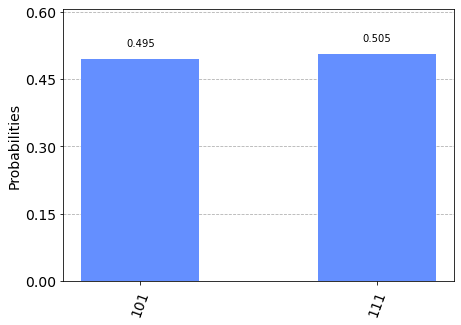

In [26]:
# Test case:
q_list = [("H",1),("X",2),("Y",0),("Z",1)]
res = circuit_builder(q_list, verbose=True) # Example function (it can be called whatever you like)
res

## Just for fun, Run on a real quantum computer! *(NOT REQUIRED)*

First we need to find the least busy backend:
```python
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
```

Next we can send the job to be run"
``` python
job = execute(qc, backend=backend, shots=100)
result = job.result()
```

Lastly, we can again plot the results in the same way:

``` python
counts = result.get_counts(qc)
plot_histogram(counts)
```

In [20]:
# Load the IBM
# IBMQ.load_account()
import os
from dotenv import load_dotenv

from qiskit_ionq import IonQProvider
from qiskit.providers.ibmq import least_busy

load_dotenv()
ionq_token = os.getenv('ionq_token')

provider = IonQProvider(ionq_token)
# provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print('least busy backend: ', backend)

# Run the job:
job = execute(qc, backend=backend, shots=100)
result = job.result()

# Plot
counts = result.get_counts(qc)
plot_histogram(counts)

IBMQError: 'No backend matches the criteria.'

### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*